In [1]:
pip install opencv-contrib-python

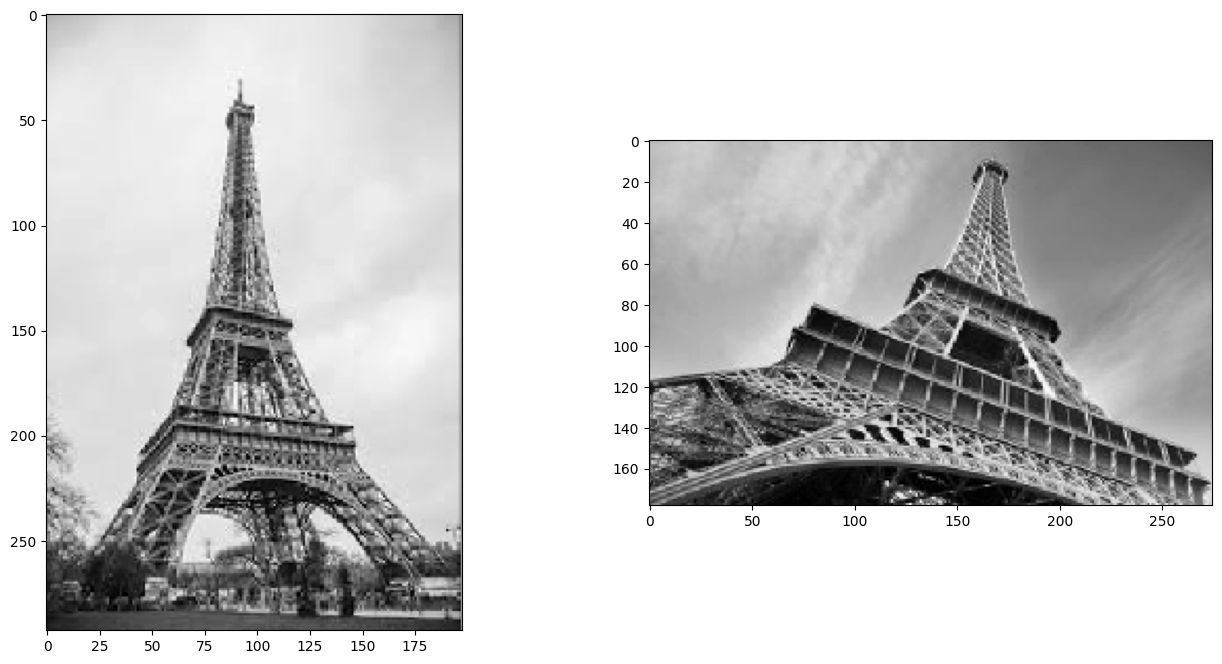

In [2]:
import cv2
import matplotlib.pyplot as plt

# read images
img1 = cv2.imread('/content/eiphel1.png', 0)
img2 = cv2.imread('/content/eiphel2.png', 0)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [3]:
img1.shape

(293, 198)

In [4]:
img2.shape

(178, 275)

In [5]:
'''
Ques. What is SIFT?

SIFT (Scale Invariant Feature Transform) Detector is used in the detection of interest points on an input image. It allows the identification of localized features in images.

Ques. How does it works ?

The SIFT features extracted from the input images are matched against each other to find k nearest-neighbors for each feature. These correspondences are then used to find m candidate matching images for each image.

'''

sift = cv2.xfeatures2d.SIFT_create() # Create SIFT with specified descriptorType.

In [6]:
keypoints_1, descriptos_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptos_2 = sift.detectAndCompute(img2, None)

In [7]:
len(keypoints_1), len(keypoints_2)

(332, 404)

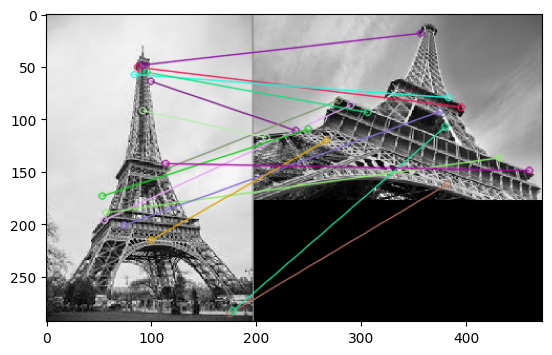

In [8]:
# Feature Matching

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)

matches = bf.match(descriptos_1, descriptos_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:15], None, flags=2)

plt.imshow(img3)

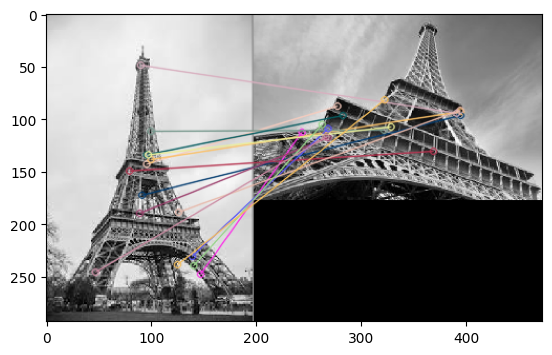

In [9]:
orb = cv2.ORB_create()

'''
Ques. What is ORB?

ORB (Oriented FAST - Keypoint Detector and Rotated BRIEF - descriptor) Detector is used in the detection of interest points on an input image. It allows the identification of localized features in images.

Ques. How does it works ?

The ORB features extracted from the input images are matched against each other to find k nearest-neighbors for each feature. These correspondences are then used to find m candidate matching images for each image.
'''

keypoints_1, descriptos_1 = orb.detectAndCompute(img1, None)
keypoints_2, descriptos_2 = orb.detectAndCompute(img2, None)

# Feature Matching

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)

matches = bf.match(descriptos_1, descriptos_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:15], None, flags=2)

plt.imshow(img3)